In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('dataset1.csv')

In [3]:
df.head(5)

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [4]:
df.isnull().sum()

,0
N,0
P,0
K,0
pH,0
EC,0
OC,0
S,0
Zn,0
Fe,0
Cu,0


In [5]:
X=df.drop('Output',axis=1)
y=df['Output']

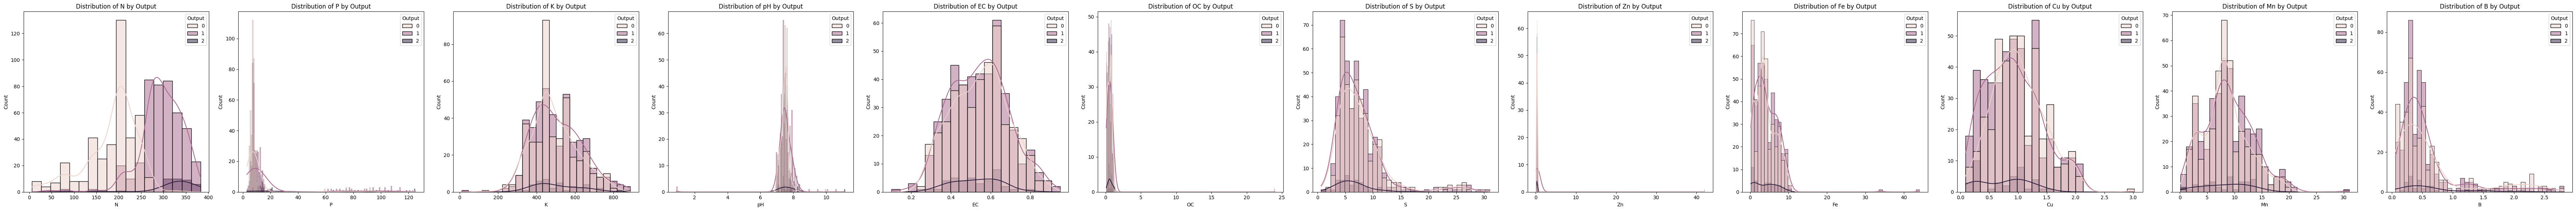

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = len(X.columns)

fig, axes = plt.subplots(1, n_cols, figsize=(6*n_cols, 6))

for i, col in enumerate(X.columns):
    sns.histplot(data=df, x=col, hue='Output', kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Output")

plt.tight_layout()
plt.show()


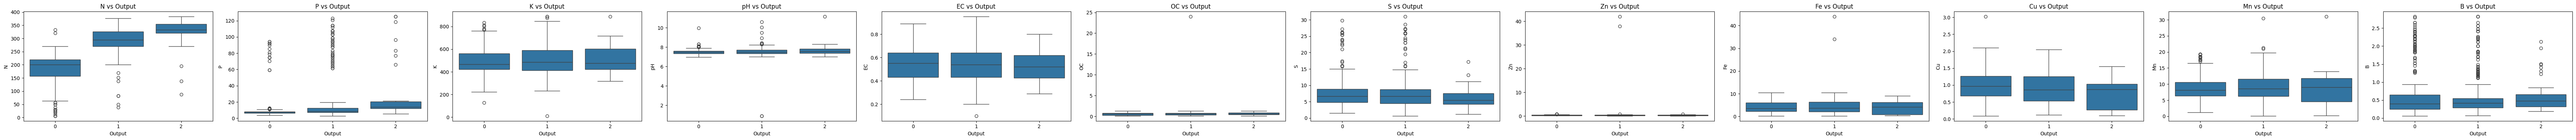

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = len(X.columns)
fig, axes = plt.subplots(1, n_cols, figsize=(6*n_cols, 4))

for i, col in enumerate(X.columns):
    sns.boxplot(x='Output', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Output")

plt.tight_layout()
plt.show()


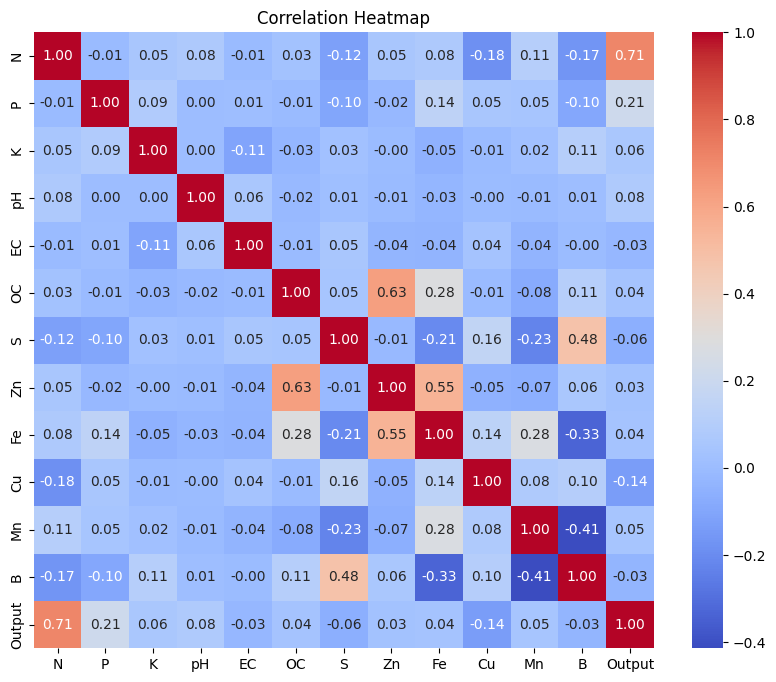

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss'
)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:26:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8977272727272727
[[76  4  0]
 [ 5 79  4]
 [ 2  3  3]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.92      0.90      0.91        88
           2       0.43      0.38      0.40         8

    accuracy                           0.90       176
   macro avg       0.75      0.74      0.75       176
weighted avg       0.89      0.90      0.90       176



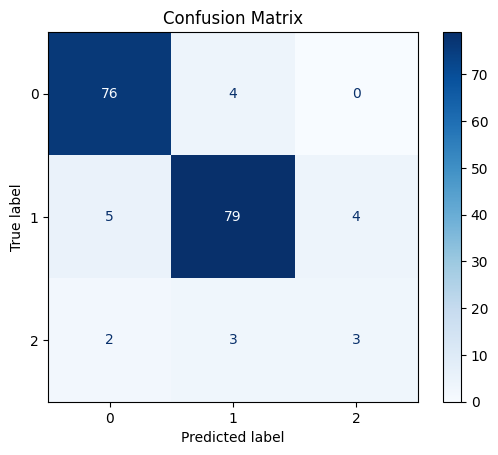

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

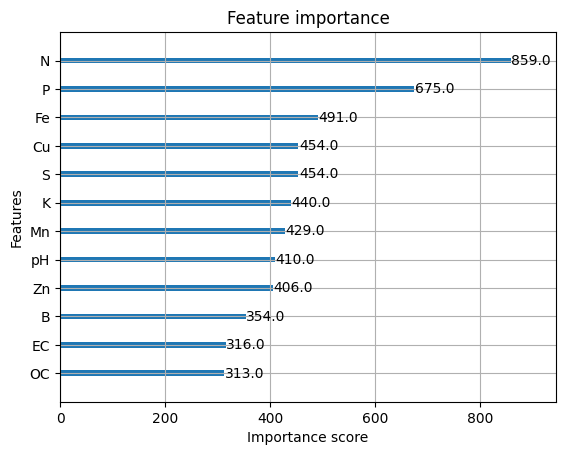

In [13]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()